# FINAL PROJECT

### Mandatory Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import Patch #Adding a legend for manually coloured bars
import datetime

## 1. Collecting data

• **What subject is your data about? What is the source of
your data?**
- Data is about Disney movies along with box office success, annual gross income and this dataset aims to seek relationship between box office gross (1) and MPAA ratings (2) in Disney movies
- Source can be found [here](https://data.world/kgarrett/disney-character-success-00-16)
- Description about data has 9 files, 23 columns. But for the sake of this final project we only  use a partial
- What are the trends in the Walt Disney Studio’s box office data? How do certain characters contribute to the success or failure of a movie?
    
• **Do authors of this data allow you to use like this? You
can check the data license**
- The Author has published this data 5 years ago and this data is eligibled for everyone to use in `About this dataset` section
- License: `CC-BY` (3)

• **How did authors collect data?**
- Data is obtained by 4 authors and their references according to their `DisneyReport.pdf`
    - https://www.sugarcane.com/data/walt-disney-animation-studios-films-1
    - http://www.the-numbers.com/movies/distributor/Walt-Disney
    - https://en.wikipedia.org/wiki/List_of_Disney_animated_universe_characters
    - https://en.wikipedia.org/wiki/The_Walt_Disney_Company#Financial_data
- They utilize [import.io](https://www.import.io) to convert raw data into csv file

## 2. Exploring data 
### (often interleaved with preprocessing)

• How many rows and how many columns?

• What is the meaning of each row?

• Are there `duplicated rows`?

• What is the meaning of each column?


• What is the current data type of each column? Are
there columns having `inappropriate data types`?

• With each numerical column, how are values
distributed?
    - What is the percentage of `missing values`?
    - Min? max? Are they `abnormal`?

• With each categorical column, how are values
distributed?
    - What is the percentage of `missing values`?
    - How many different values? Show a few
      Are they `abnormal`?

### Read csv into Dataframe

In [2]:
movies_gross = pd.read_csv('Data/disney_movies_total_gross.csv')
movies_gross.sample(5)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
42,My Science Project,1985-08-09,Comedy,NaN,4100000,9736051
437,The Wild,2006-04-14,Adventure,G,37384046,48114115
400,Home on the Range,2004-04-02,Comedy,PG,50026353,67910166
550,The Hundred-Foot Journey,2014-08-08,Romantic Comedy,PG,54235441,55961409
147,Indian Summer,1993-04-23,Comedy,R,14717851,29968953


### How many rows and how many columns?

In [3]:
print("rows:"+ str(movies_gross.shape[0]))
print("columns:"+ str(movies_gross.shape[1]))

rows:579
columns:6


### What is the meaning of column and values?

- `movie_title` : title of a movie  
- `release_date`: the date this movie release  
- `genre`:  Genre of a movie  
- `mpaa_rating`: MPAA ratings of a movie
    - `G`: **General Audiences** All ages admitted. Nothing that would offend parents for viewing by children
    
    - `PG`: **Parental Guidance Suggested** Some material may not be suitable for children. Parents urged to give "parental guidance". May contain some material parents might not like for their young children.
    
    - `PG-13`: **Parents Strongly Cautioned** Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some material may be inappropriate for pre-teenagers.
    
    - `R`: **Restricted** Under 17 requires accompanying parent or adult guardian. Contains some adult material. Parents are urged to learn more about the film before taking their young children with them.
    
    - `Not Rated`
    
- `total_gross`: Total gross of a movie   
- `inflation_adjusted_gross`: inflation of a movies

In [4]:
movies_gross.sample(1)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
136,The Distinguished Gentleman,1992-12-04,Comedy,R,46434570,94349900


### What is the current data type of each column? Are there columns having inappropriate data types?

In [5]:
def open_object_dtype(s):
    dtypes = set()
    dtypes = set(s.apply(type))
    return dtypes

In [6]:
print('movies_title :' + str(open_object_dtype(movies_gross['movie_title'])))
print('release_date :' + str(open_object_dtype(movies_gross['release_date'])))
print('genre :' + str(open_object_dtype(movies_gross['genre'])))
print('mpaa_rating :' + str(open_object_dtype(movies_gross['mpaa_rating'])))
print('total_gross :' + str(open_object_dtype(movies_gross['total_gross'])))
print('inflation_adjusted_gross :' + str(open_object_dtype(movies_gross['inflation_adjusted_gross'])))

movies_title :{<class 'str'>}
release_date :{<class 'str'>}
genre :{<class 'str'>, <class 'float'>}
mpaa_rating :{<class 'str'>, <class 'float'>}
total_gross :{<class 'int'>}
inflation_adjusted_gross :{<class 'int'>}


- As we can see both `Genre` and `mpaa_rating` have the same dtypes of `str` and `float`
- Since we have noticed so far, `release_date` needs converting to Datetime for later use
- Other columns is appropriate 

#### Convert columns into appropriate dtype
- `release_date` converts into datetime dtype
- `genre` converts into string dtype
- `mapaa_rating` converts into string dtype

In [7]:
movies_gross.loc[:,'release_date'] = pd.to_datetime(movies_gross.loc[:,'release_date'],format='%Y/%m/%d')
movies_gross.loc[:,'genre'] = movies_gross.loc[:,'genre'].astype(str)
movies_gross.loc[:,'mpaa_rating'] = movies_gross.loc[:,'mpaa_rating'].astype(str)

### Are there duplicated rows?

In [8]:
have_duplicated_rows = movies_gross.duplicated().any()
have_duplicated_rows

False

### What is the meaning of each row?

Each row is a pack of information of a single movie

In [9]:
movies_gross.sample(1)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
466,College Road Trip,2008-03-07,Comedy,G,45610425,53550960


### With each numerical column, how are values distributed? - What is the percentage of missing values? - Min? max? Are they abnormal?

- We arrange `release_date`, `total_gross`, `inflation_adjusted_gross` column into numerical group
- Each of columns we're going to merge `missing_ratio`, `min`, and `max` into one dataframe

- `mpaa_rating` column is abnormal because the owner predetermine `nan` values as `string`
-  `total_gross`, `inflation_adjusted_gross` column are abnormal because the owner predetermine `0` as `nan` value

So we have to convert `nan` and `0` into appropriate `np.nan` value

In [10]:
movies_gross.loc[:,'mpaa_rating'].replace('nan',np.nan,inplace=True)
movies_gross.loc[:,'total_gross'].replace(0,np.nan,inplace=True)
movies_gross.loc[:,'inflation_adjusted_gross'].replace(0,np.nan,inplace=True)
movies_gross.loc[:,'genre'].replace('nan',np.nan,inplace=True)

In [11]:
missing = []
missing.append(round(movies_gross.loc[:,'release_date'].isna().sum() / movies_gross.loc[:,'release_date'].size * 100,3))
missing.append(round(movies_gross.loc[:,'total_gross'].isna().sum() / movies_gross.loc[:,'total_gross'].size * 100,3))
missing.append(round(movies_gross.loc[:,'inflation_adjusted_gross'].isna().sum() / movies_gross.loc[:,'inflation_adjusted_gross'].size * 100,3))

minval = []
minval.append(movies_gross.loc[:,'release_date'].min())
minval.append(movies_gross.loc[:,'total_gross'].min())
minval.append(movies_gross.loc[:,'inflation_adjusted_gross'].min())

maxval = []
maxval.append(movies_gross.loc[:,'release_date'].max())
maxval.append(movies_gross.loc[:,'total_gross'].max())
maxval.append(movies_gross.loc[:,'inflation_adjusted_gross'].max())

pd.DataFrame([missing,minval,maxval],index=["missing_ratio", "min", "max"],columns=["release_date", "total_gross", "inflation_adjusted_gross"])


,release_date,total_gross,inflation_adjusted_gross
missing_ratio,0.0,6.910000e-01,6.910000e-01
min,1937-12-21 00:00:00,2.815000e+03,2.984000e+03
max,2016-12-16 00:00:00,9.366622e+08,5.228953e+09


### With each categorical column, how are values distributed? - What is the percentage of missing values? - How many different values? Show a few. Are they abnormal?

- We arrange `movie_title`, `genre`, `mpaa_rating` column into categorical group

In [12]:
missing = []
missing.append(movies_gross.loc[:,'movie_title'].isna().sum() / movies_gross.loc[:,'movie_title'].size * 100)
missing.append(movies_gross.loc[:,'genre'].isna().sum() / movies_gross.loc[:,'genre'].size * 100)
missing.append(movies_gross.loc[:,'mpaa_rating'].isna().sum() / movies_gross.loc[:,'mpaa_rating'].size * 100)

unique = []
unique.append(movies_gross.loc[:,'movie_title'].nunique(dropna=True))
unique.append(movies_gross.loc[:,'genre'].nunique(dropna=True))
unique.append(movies_gross.loc[:,'mpaa_rating'].nunique(dropna=True))

diff_val = []
diff_val.append(movies_gross.loc[:,'movie_title'].dropna().unique())
diff_val.append(movies_gross.loc[:,'genre'].dropna().unique())
diff_val.append(movies_gross.loc[:,'mpaa_rating'].dropna().unique())

pd.DataFrame([missing,unique,diff_val],index=["missing_ratio","Unique",'diff_val'],columns=["movie_title", "genre", "mpaa_rating"])



,movie_title,genre,mpaa_rating
missing_ratio,0.0,2.936097,9.671848
Unique,573,12,5
diff_val,"[Snow White and the Seven Dwarfs, Pinocchio, F...","[Musical, Adventure, Drama, Comedy, Action, Ho...","[G, Not Rated, PG, R, PG-13]"


- We are noticing no abnormal in categroical group

## 3. Asking meaningful questions

Your group needs to give ≥ `the-number-of-group-members`
questions which can be answered with this data. Each
question should be `meaningful` (what are benefits of finding
the answer?) and `not too easy to answer` (e.g., it’s too easy if
we just need one line of code to get the answer). Your
group should focus more on `the quality of questions` than
the quantity.

In notebook file, with each question, your group needs to
present:

• What are the question?
- Which genres give out most total gross and least in total.
- Scrutinizing dataset to have a aquisition of the most favorite characters, along with director.
- Investigate business efficacy of both action and adventure genre on the latter and former 20th century.
- How favorite customer genres trend differ over time?.


• What are benefits of finding the answer?
- To examine which genres should Disney zero in on to produce the best quality, story for upcoming films.
- To consider should Disney invite directors and voice actors to participate in future films.
- To see total gross in differences, whether Disney do any better than the past and still attracted more potential customers.
- To which genres in the near future should Disney concentrate on.

## 4. Preprocessing + analyzing data to answer each question

With each question:

• Does it need to have preprocessing step, and if yes,
how does your group preprocess?

• Text: sketch steps `clearly` so that readers can
understand how your group preprocesses even without
reading code

• Code: implement sketched steps. Your group should
also try to write code `clearly` (choose good variable
names, comment where should be commented, don’t
let a line too long)

• How does your group analyze data to answer the
question?

### **Question 1:**
**Which genres give out most total gross and least in total (thể loại nào đem lại lợi nhuận cao nhất và thấp nhất)**

**Step-by-step ouline:**
- Group by similar genres
- Ascertain largest gross of a specific genre
- Ascertain lowest gross of a specific genre

In [13]:

genre_total_gross = movies_gross.groupby('genre')['inflation_adjusted_gross'].sum()
genre_max = genre_total_gross[genre_total_gross == genre_total_gross.max()]
genre_min = genre_total_gross[genre_total_gross == genre_total_gross.min()]

print('Film gives out the most adjusted gross is:',genre_max.index[0])
print('With total of gross:',genre_max.values[0],'USD')
print()
print('Film gives out the least adjusted gross is:',genre_min.index[0])
print('With total of gross:',genre_min.values[0],'USD')

Film gives out the most adjusted gross is: Adventure
With total of gross: 24561266158.0 USD

Film gives out the least adjusted gross is: Concert/Performance
With total of gross: 114821678.0 USD


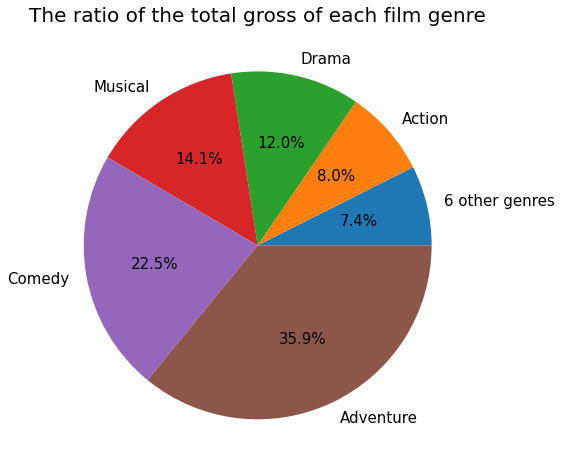

In [14]:
df = genre_total_gross.sort_values()
temp = pd.Series([df.head(7).sum()],index = ['6 other genres'])
df = df.add(temp, fill_value=0)
df = df.sort_values().tail(6)

ax = df.plot.pie(figsize=(8, 8),autopct='%1.1f%%',title ='asd',fontsize = 15)
ax.set_ylabel('');
ax.set_title('The ratio of the total gross of each film genre',fontsize =20);

In [15]:
print("3 genres give out the most adjusted gross")
print(genre_total_gross.sort_values().head(3))

3 genres give out the most adjusted gross
genre
Concert/Performance    114821678.0
Horror                 140483092.0
Black Comedy           156730475.0
Name: inflation_adjusted_gross, dtype: float64


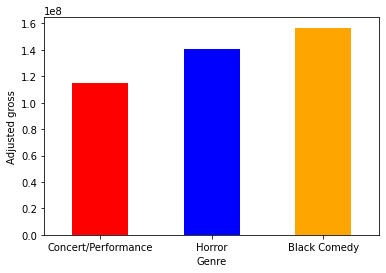

In [16]:
df = genre_total_gross.sort_values().head(3)
my_colors = ['red','blue','orange']
ax =df.plot.bar(rot=0,color= my_colors)
ax.set_xlabel('Genre')
ax.set_ylabel('Adjusted gross');

In [17]:
print("3 genres give out the least adjusted gross")
print(genre_total_gross.sort_values().tail(3))

3 genres give out the least adjusted gross
genre
Musical      9.657566e+09
Comedy       1.540953e+10
Adventure    2.456127e+10
Name: inflation_adjusted_gross, dtype: float64


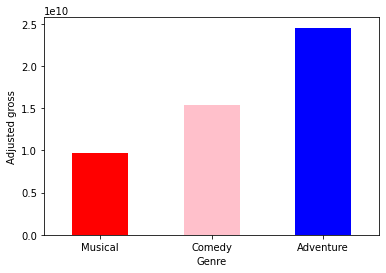

In [18]:
df = genre_total_gross.sort_values().tail(3)
my_colors = ['red','pink','blue']
ax =df.plot.bar(rot=0,color= my_colors)
ax.set_xlabel('Genre')
ax.set_ylabel('Adjusted gross');

**Assessing:**
- Being an amusing cooperation, perhaps `horror` or `black comedy` or `Concert/Performance` is not one of their advantages. However, `musical`, `Comedy` or `Adventure` are the genres they need to focus in more and put more strenuous effort to boost their gross and marketing their slogan

### Question 2:
**Scrutinizing dataset to have a aquisition of the most favorite characters, along with director**

**Step-by-step outline:**
- Read `Disney_characters.csv` and `disney_director.csv`
- Join 3 tables by `movie_title`
- Find top_5 movies give out highest gross

In [19]:
df_character = pd.read_csv('Data/disney_characters.csv')
df_character.loc[:,'movie_title'] = df_character['movie_title'].str.strip()
df_reduce_character = df_character.loc[:,['movie_title','hero','villian']]

In [20]:
movies = movies_gross.copy()
df_director = pd.read_csv('Data/disney_director.csv')

df = movies.set_index('movie_title').join([df_reduce_character.set_index('movie_title'),df_director.set_index('name')]).reset_index()
df = df.rename(columns={'index':'movie_title'})
top_10 = df.sort_values('inflation_adjusted_gross',ascending=False)['inflation_adjusted_gross'].unique()[:10]
df.sort_values('inflation_adjusted_gross',ascending=False).loc[df['inflation_adjusted_gross'].isin(top_10),:]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,hero,villian,director
380,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485.0,5.228953e+09,Snow White,Evil Queen,David Hand
324,Pinocchio,1940-02-09,Adventure,G,84300000.0,2.188229e+09,Pinocchio,Stromboli,Ben Sharpsteen
154,Fantasia,1940-11-13,Musical,G,83320000.0,2.187091e+09,NaN,Chernabog,full credits
0,101 Dalmatians,1961-01-25,Comedy,G,153000000.0,1.362871e+09,NaN,NaN,Wolfgang Reitherman
251,Lady and the Tramp,1955-06-22,Drama,G,93600000.0,1.236036e+09,Lady and Tramp,Si and Am,Hamilton Luske
383,Song of the South,1946-11-12,Adventure,G,65000000.0,1.078511e+09,NaN,NaN,NaN
390,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225.0,9.366622e+08,NaN,NaN,NaN
99,Cinderella,1950-02-15,Drama,G,85000000.0,9.206087e+08,Cinderella,Lady Tremaine,Wilfred Jackson
464,The Jungle Book,1967-10-18,Musical,Not Rated,141843000.0,7.896123e+08,Mowgli,Kaa and Shere Khan,Wolfgang Reitherman
475,The Lion King,1994-06-15,Adventure,G,422780140.0,7.616409e+08,Simba,Scar,Roger Allers


**Assessing:**
- Top 10 best movies were released before 20th century and a handful of hero, villian, director who made an excellent contribution to the movie.
- This analysis recommends Disney to reconsider to make a movie that consists of all favorite characters for everyone to reminiscent of their childhood

### Question 3:
**Investigate business efficacy of both action and adventure genre on the latter and former 20th century**

**Step-by-step outline:**
- Filter action and adventure films
- Create another `year` column extracted from `release_date`
- Group films before and after of the year 2000
- Calculate total gross on `inflation_adjusted_gross`
- Calculate mean gross each film in 2 periods 
- Conclusion

In [21]:
movies_gross['year'] = pd.DatetimeIndex(movies_gross['release_date']).year

options = ['Action','Adventure']
df = movies_gross[movies_gross['genre'].isin(options)]

before_20th_df = df[df['year'] <= 2000] 
after_20th_df = df[df['year'] > 2000]
total_gross_before20th = before_20th_df['inflation_adjusted_gross'].sum()
total_gross_after20th = after_20th_df['inflation_adjusted_gross'].sum()

num_films_before20th = before_20th_df['movie_title'].count()
num_films_after20th = after_20th_df['movie_title'].count()

print('Consider on both Action and Aventure film:','\n')
print('Total adjusted gross before 20th century:',total_gross_before20th)
print('Number of films before 20th century:',num_films_before20th)
print('Released time:',before_20th_df['year'].min(),'->',before_20th_df['year'].max(),'\n')

print('Total adjusted gross after 20th century:',total_gross_after20th)
print('Number of films after 20th century:',num_films_after20th)
print('Released time:',after_20th_df['year'].min(),'->',after_20th_df['year'].max(),'\n')



Consider on both Action and Aventure film: 

Total adjusted gross before 20th century: 12152462471.0
Number of films before 20th century: 75
Released time: 1940 -> 2000 

Total adjusted gross after 20th century: 17907740473.0
Number of films after 20th century: 94
Released time: 2001 -> 2016 



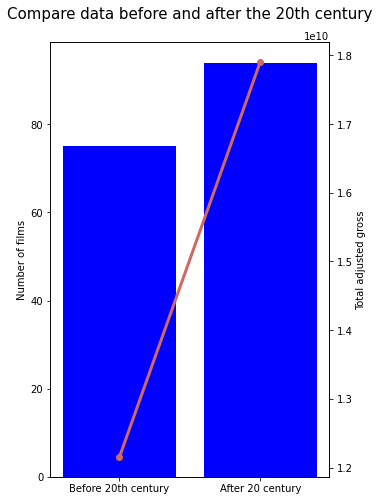

In [22]:
data = {'time' : ['Before 20th century', 'After 20 century'],
       'Number of films' : [num_films_before20th,num_films_after20th],
       'Total adjusted gross' : [total_gross_before20th,total_gross_after20th]}
df = pd.DataFrame.from_dict(data)
fig = plt.figure(figsize=(5,8))
ax1 = plt.subplot(1,1,1)
ax1.bar(df.time,df['Number of films'], color = 'blue')
ax1.set_ylabel('Number of films')


ax2 = ax1.twinx()
ax2.plot(df.time,df['Total adjusted gross'],'o-',color='#cf6a63',linewidth = 3)
ax2.set_ylabel('Total adjusted gross')
ax2.set_title('Compare data before and after the 20th century\n', size=15)
plt.show()

In [23]:
print('Mean gross before the 20th:',round(total_gross_before20th/num_films_before20th,2))
print('Mean gross affter the 20th:',round(total_gross_after20th/num_films_after20th,2))
print('(There has been a raise in action and adventure genres)','\n')

ratio = (total_gross_after20th/num_films_after20th) / (total_gross_before20th/num_films_before20th) - 1
print('Increase rate:',ratio.round(4)*100,'%')

Mean gross before the 20th: 162032832.95
Mean gross affter the 20th: 190507877.37
(There has been a raise in action and adventure genres) 

Increase rate: 17.57 %


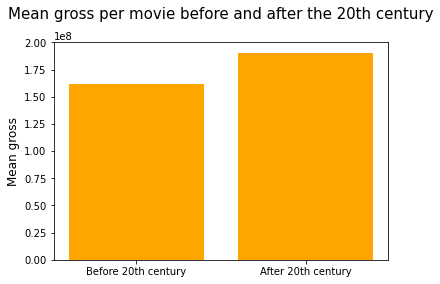

In [24]:
x = ['Before 20th century','After 20th century']
y = [round(total_gross_before20th/num_films_before20th,2),round(total_gross_after20th/num_films_after20th,2)]

plt.bar(x,y, color = 'orange');
plt.title('Mean gross per movie before and after the 20th century\n', fontsize = 15)
plt.ylabel('Mean gross',fontsize = 12)
plt.show()

**Assessing:**
- Business eficacy see a soar at both action and adventure genres.
- Increase in number of produced films:
    - Before 20th century, in **60 years** produced **75 films** 
    - After 20th century, in **15 years** produced **94 films** 
- Increase in total of income:
    - Revenue growth rate on each films: **increase 17,57 %**

### Question 4:
**How favorite customer genres trend differ over time?**
- To solve this question, I split into periods (1 period = 5 years). With each circle, we consider which genre Disney made the most and assessing customers trend


- **Step-by-step outline:**
    - Add `phase` column extracted from `year` column
    - Over the course of `< 1940` merged into the first stage 
    - During the course of `> 2015` merged into the last stage (because dataset has a maximum datetime of 2016) 
    - Find out genre-trend in each interval
    - Ascertain favorite genres trend

In [25]:
df = movies_gross
df['phase'] = ((df['year'] - 1940) / 5).apply(int)
df.loc[df['year'] <1940, 'phase'] = 0
df.loc[df['year'] >2015, 'phase'] = 15

temp = df.groupby(['phase','genre'])['inflation_adjusted_gross'].sum()

df = df.groupby(['phase','genre'])['genre'].count()
df = df.unstack(1)

df = df.idxmax(axis=1).to_frame()
df.columns = ['genre trend']
df = df.reset_index()
df1= df.copy()

list_phase = pd.array(df.phase)
list_genre = pd.array(df['genre trend'])
arr = []
for i in range(len(list_phase)):
    arr.append(temp[list_phase[i]][list_genre[i]])

df['gross'] = arr

df['phase'] = (df['phase']*5+1940).apply(int).apply(str) + ' - ' + (df['phase']*5+1944).apply(int).apply(str)
df['phase'][0] = '1937 - 1944'
df['phase'][15] = '2015 - 2016'

df

C:\Users\ASUS\AppData\Local\Temp/ipykernel_10328/2995473150.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['phase'][0] = '1937 - 1944'
C:\Users\ASUS\AppData\Local\Temp/ipykernel_10328/2995473150.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['phase'][15] = '2015 - 2016'


,phase,genre trend,gross
0,1937 - 1944,Musical,7.416044e+09
1,1945 - 1949,Adventure,1.078511e+09
2,1950 - 1954,Adventure,5.282800e+08
3,1955 - 1959,Drama,1.257541e+09
4,1960 - 1964,Comedy,1.782547e+09
5,1965 - 1969,Comedy,1.386127e+08
6,1970 - 1974,Musical,3.464669e+08
7,1975 - 1979,Comedy,2.293146e+08
8,1980 - 1984,Drama,1.285149e+08
9,1985 - 1989,Comedy,2.178017e+09


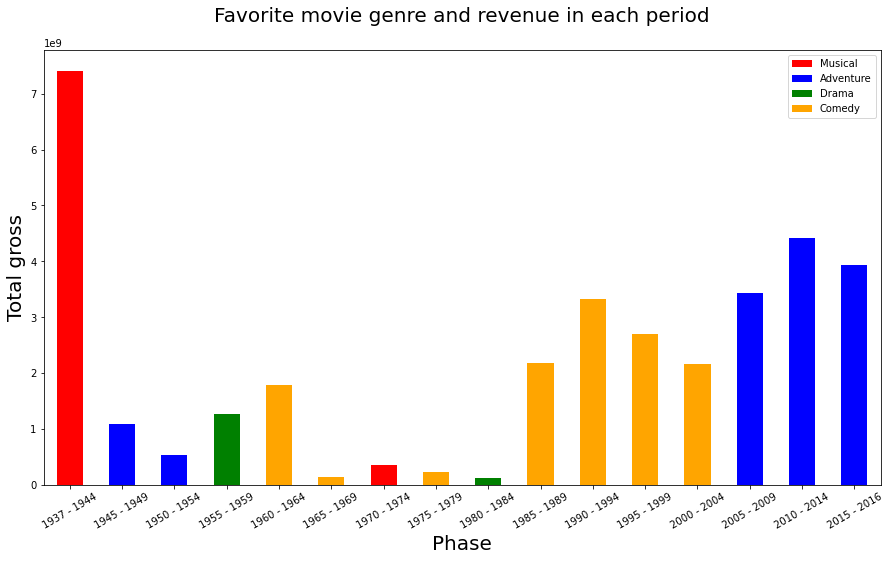

In [26]:
df.index = df.phase
fig = plt.figure(figsize=(15,8))
my_colors = {'Musical':'red','Adventure':'blue','Drama':'green','Comedy':'orange'}
ax = df['gross'].plot(kind = 'bar',color=df['genre trend'].replace(my_colors),rot=30
                     ).legend(
    [
        Patch(facecolor = my_colors['Musical']),
        Patch(facecolor = my_colors['Adventure']),
        Patch(facecolor = my_colors['Drama']),
        Patch(facecolor = my_colors['Comedy'])
    ], ['Musical','Adventure','Drama','Comedy']
)

plt.xlabel('Phase',fontsize =20)
plt.ylabel('Total gross',fontsize =20)
plt.title('Favorite movie genre and revenue in each period\n', fontsize =20)
plt.show()

**Assessing:**
- Favorite genres trend see a shift over time
- during 1937-1959, can not see a whole shape which trends prevail because all 4 periods has 3 different genres
- Over the course of 1960-2004, `Comedy` stands out as the most prevailling genres, outstripping the others
- Over 2005-2016, `Comedy` no longer dominated. Instead, `Adventure` is the new king till now.

## 5. Reflection

• Each member: What difficulties have you encountered?

`19127516 - Xuân Phước` : data visualization, find questions.

`19127403 - Trung Hiếu` : Forming questions, look for a dataset.

• Each member: What have you learned?

`19127516 - Xuân Phước` : Learn more about libraries pandas, numpy, matplotlib. How to make a complete project.

`19127403 - Trung Hiếu` : I have learnt how to obtain dataset on different website and how to do basic analitics. What to do first with a dataset such as check for duplicate row, missing values, inappropriates data, etc.

• Your group: If you had more time, what would you do?
- If we have more time maybe we'll implement some Learning algorithms to this dataset to find out should Disney make more Action/Adventure movies.

## 6. References and Footnote:
- Moodle
- https://data.world/kgarrett/disney-character-success-00-16
- https://www.sugarcane.com/data/walt-disney-animation-studios-films-1
- http://www.the-numbers.com/movies/distributor/Walt-Disney
- https://en.wikipedia.org/wiki/List_of_Disney_animated_universe_characters
- https://en.wikipedia.org/wiki/The_Walt_Disney_Company#Financial_data


To finish this project, what materials have you consulted?



(1): `Box office gross` -> Revenue generated from ticket sales (receipts) including any taxes and other levies.  
(2): `MPAA ratings` -> The MPAA rating system is a voluntary film-rating system created by the Motion Picture Association of America (MPAA) and the National Association of Theatre Owners (NATO) to determine a movie's suitability for audiences and age groups based on content.  
(3): `CC-BY` -> it is the most open license. It allows the user to redistribute, to create derivatives, such as a translation, and even use the publication for commercial activities, provided that appropriate credit is given to the author (BY) and that the user indicates whether the publication has been changed.